<h1> PART 2 </h2>

In [2]:
import pandas as pd
import numpy as np
!pip install geocoder
import geocoder 

     |████████████████████████████████| 102kB 6.9MB/s ta 0:00:011


Adding the Toronto data from the previous task

In [4]:
TN_data = pd.read_csv(r'Toronto_Neighborhoods.csv')

In [5]:
TN_data.drop('Unnamed: 0', axis = 1, inplace = True)

Geodecoder arcgis is used since it works 

In [6]:
latitude = []
longitude = []

for pc in TN_data['PostalCode']:
    g = geocoder.arcgis('{}, Toronto, Ontario'.format(pc))
    lat_lng_coords = g.latlng
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])

Adding the given data

In [29]:
ltlng = pd.read_csv(r'http://cocl.us/Geospatial_data')
ltlng_for_test = ltlng

Testing the difference between given data and obtained data from geocoder.arcgis

In [22]:
test = TN_data
test['latitude'] = latitude
test['longitude'] = longitude

ltlng_for_test.rename(columns={"Postal Code": "PostalCode", 'Latitude':'Latitude2','Longitude':'Longitude2'}, inplace = True)

ntest = test.merge(ltlng_for_test)

In [31]:
lo1 = ntest['latitude'].values
lo2 = ntest['Latitude2'].values
lng1 = ntest['longitude'].values
lng2 = ntest['Longitude2'].values

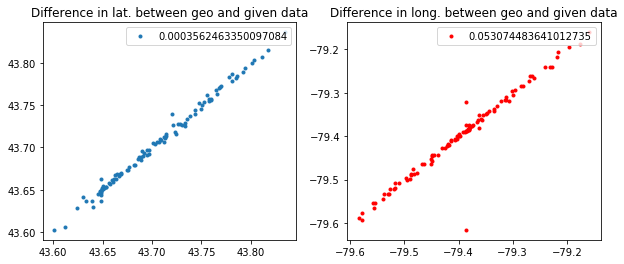

In [32]:
import matplotlib.pyplot as plt

max_diff_lo = ((lo1-lo2)**2).max()
max_diff_lng = ((lng1 - lng2)**2).max()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax[0].plot(lo1, lo2, '.',label=max_diff_lo)
ax[0].legend(loc="upper right")
ax[0].set_title('Difference in lat. between geo and given data')

ax[1].plot(lng1,lng2,'r.', label=max_diff_lng)
ax[1].legend(loc="upper right")
ax[1].set_title('Difference in long. between geo and given data')

plt.show()

_since the data shows some difference, given data will be used_

In [33]:
mrg_TN_data = TN_data.drop(['latitude','longitude'], axis = 1).merge(ltlng.rename(columns={"Postal Code": "PostalCode"}))
mrg_TN_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [34]:
mrg_TN_data.to_csv(r'Toronto_Neighborhoods_withltlng.csv')